In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('../DataSet/E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()
df.select_dtypes(exclude=np.number).columns
df.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])
data_info = df.info()
data_head = df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.750000,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.000000,1.00
Tenure,5630.0,10.189899,8.354164,0.0,3.00,9.00,15.000000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.000000,3.00
WarehouseToHome,5630.0,15.639896,8.339095,5.0,9.00,14.00,20.000000,127.00
HourSpendOnApp,5630.0,2.931535,0.705384,0.0,2.00,3.00,3.000000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.000000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.000000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.000000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.000000,1.00


In [12]:
data_head

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
# Data Cleaning
data = df
missing_values = data.isnull().sum() / len(data) * 100

missing_values = missing_values[missing_values > 0].sort_values(ascending=False)


numerical_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)

remaining_missing_values = data.isnull().sum().sum()

missing_values, remaining_missing_values

(DaySinceLastOrder              5.452931
 OrderAmountHikeFromlastYear    4.706927
 Tenure                         4.689165
 OrderCount                     4.582593
 CouponUsed                     4.547069
 HourSpendOnApp                 4.529307
 WarehouseToHome                4.458259
 dtype: float64,
 0)

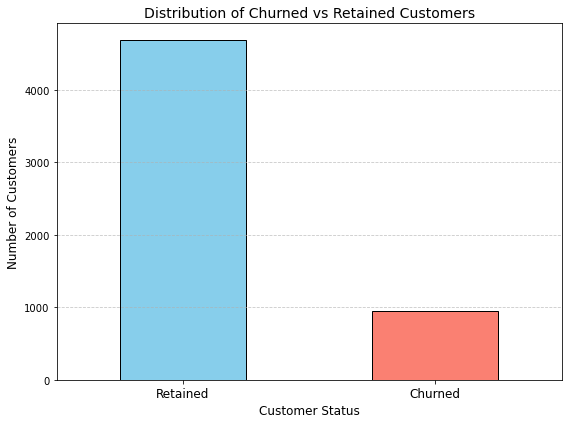

In [46]:
import matplotlib.pyplot as plt

# Count the distribution of churned (1) vs retained (0) customers

churn_counts = data['Churn'].value_counts()

# Create a bar chart for the distribution
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Distribution of Churned vs Retained Customers', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Retained', 'Churned'], rotation=0, fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Customer Status', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the bar chart
plt.tight_layout()
plt.show()

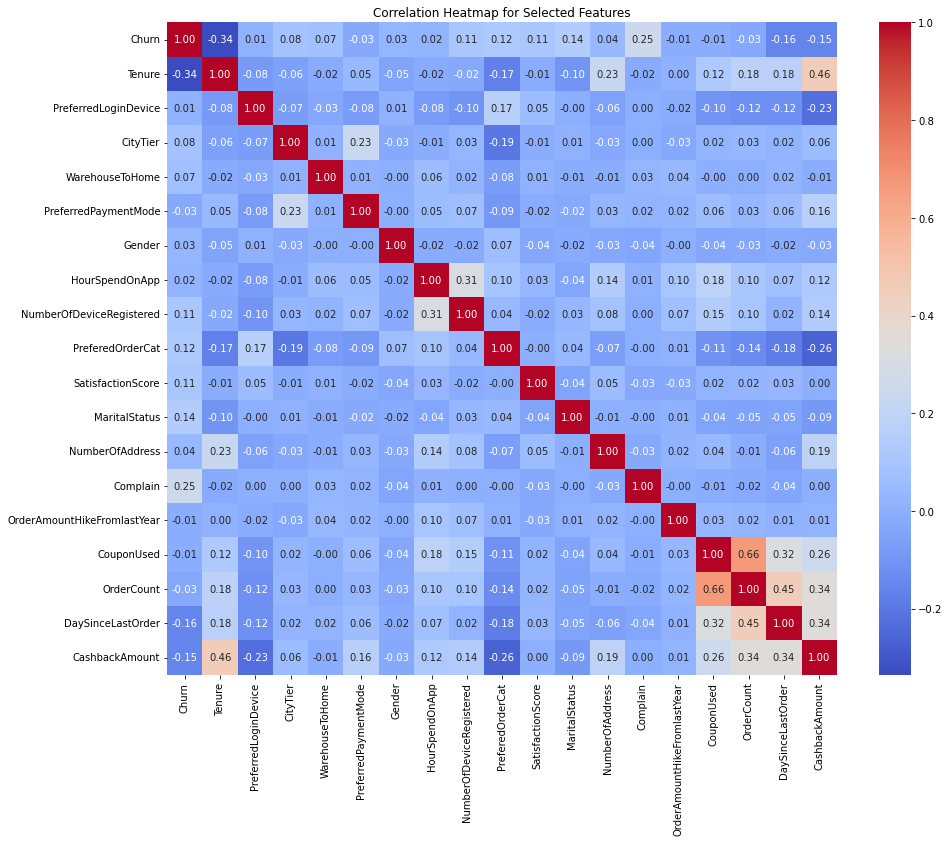

In [39]:
import matplotlib.pyplot as plt

heatmap_features = [
    'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
    'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
    'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
    'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
    'DaySinceLastOrder', 'CashbackAmount'
]

# Encode categorical variables for correlation calculation if necessary
encoded_data = data.copy()

# Encoding categorical columns using Label Encoding (if applicable)
from sklearn.preprocessing import LabelEncoder
categorical_columns = [
    'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'
]
label_encoder = LabelEncoder()

for col in categorical_columns:
    encoded_data[col] = label_encoder.fit_transform(data[col])

# Compute the correlation matrix
correlation_matrix_heatmap = encoded_data[heatmap_features].corr()

# Generate the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_heatmap, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap for Selected Features")
plt.show()

In [47]:
correlation_matrix_heatmap

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.335513,0.013281,0.084703,0.073497,-0.026519,0.029264,0.018126,0.107939,0.118922,0.105481,0.140316,0.043931,0.250188,-0.009949,-0.008197,-0.028342,-0.156152,-0.154118
Tenure,-0.335513,1.000000,-0.080700,-0.059603,-0.017301,0.045222,-0.045980,-0.019451,-0.023506,-0.172806,-0.013627,-0.104242,0.232337,-0.020780,0.004907,0.119231,0.175909,0.175011,0.460495
PreferredLoginDevice,0.013281,-0.080700,1.000000,-0.074136,-0.028205,-0.078001,0.007272,-0.076206,-0.102246,0.165255,0.051483,-0.003821,-0.055192,0.002670,-0.016269,-0.104401,-0.118313,-0.117314,-0.229482
CityTier,0.084703,-0.059603,-0.074136,1.000000,0.010445,0.233722,-0.025176,-0.008982,0.027934,-0.194898,-0.011554,0.006818,-0.029440,0.003375,-0.030811,0.021009,0.032625,0.016924,0.055746
WarehouseToHome,0.073497,-0.017301,-0.028205,0.010445,1.000000,0.010554,-0.001038,0.058605,0.018641,-0.075283,0.007537,-0.012789,-0.010782,0.027969,0.036999,-0.003641,0.002222,0.016900,-0.008952
PreferredPaymentMode,-0.026519,0.045222,-0.078001,0.233722,0.010554,1.000000,-0.000493,0.050846,0.069011,-0.091811,-0.015755,-0.024368,0.028773,0.016366,0.021993,0.058621,0.032521,0.057782,0.160674
Gender,0.029264,-0.045980,0.007272,-0.025176,-0.001038,-0.000493,1.000000,-0.018349,-0.021799,0.065843,-0.035220,-0.017370,-0.031492,-0.040269,-0.000292,-0.037642,-0.030581,-0.020175,-0.025190
HourSpendOnApp,0.018126,-0.019451,-0.076206,-0.008982,0.058605,0.050846,-0.018349,1.000000,0.307749,0.096732,0.031156,-0.039742,0.141736,0.006824,0.101893,0.182959,0.104631,0.071523,0.118648
NumberOfDeviceRegistered,0.107939,-0.023506,-0.102246,0.027934,0.018641,0.069011,-0.021799,0.307749,1.000000,0.044399,-0.017228,0.033645,0.084997,0.003407,0.068148,0.148638,0.100316,0.017746,0.137183
PreferedOrderCat,0.118922,-0.172806,0.165255,-0.194898,-0.075283,-0.091811,0.065843,0.096732,0.044399,1.000000,-0.001092,0.043688,-0.069150,-0.004149,0.013105,-0.106478,-0.135215,-0.182766,-0.264153


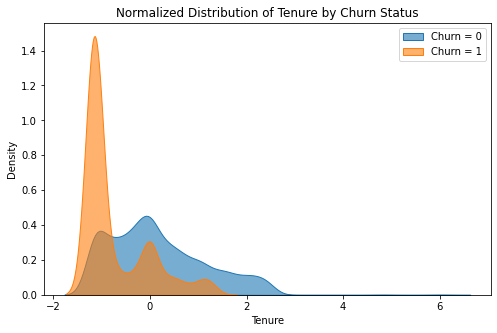

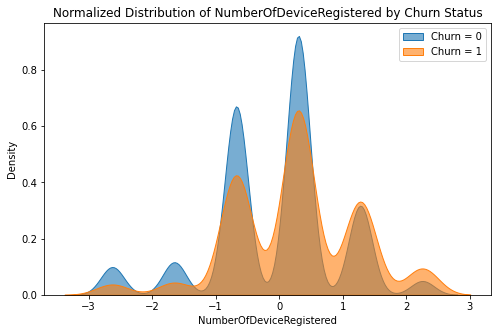

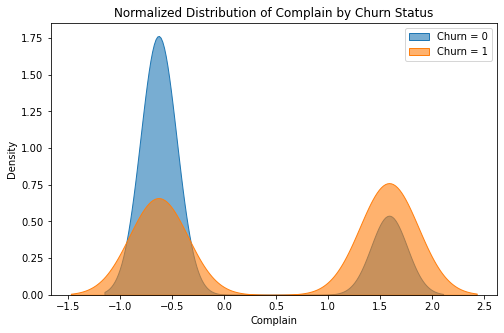

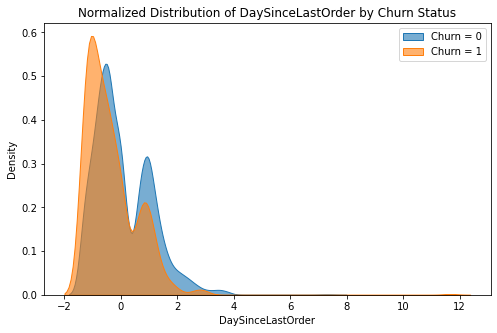

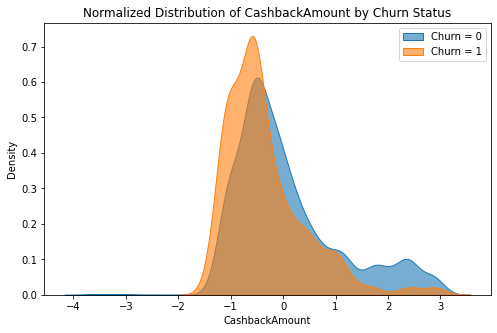

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
numerical_features = [
    'Tenure', 'NumberOfDeviceRegistered', 'Complain', 'DaySinceLastOrder', 'CashbackAmount'

]

scaler = StandardScaler()

normalized_data = data.copy()
normalized_data[numerical_features] = scaler.fit_transform(data[numerical_features])

for feature in numerical_features:
    normalized_data[feature] = pd.to_numeric(normalized_data[feature], errors='coerce')
    normalized_data[feature].fillna(0, inplace=True)  # Replace invalid values with 0

# Visualize normalized features grouped by Churn
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=normalized_data[normalized_data['Churn'] == 0][feature], 
                label='Churn = 0', fill=True, alpha=0.6)
    sns.kdeplot(data=normalized_data[normalized_data['Churn'] == 1][feature], 
                label='Churn = 1', fill=True, alpha=0.6)
    plt.title(f'Normalized Distribution of {feature} by Churn Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


In [ ]:
normalized_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,5.281550e+04,1625.385339,50001.000000,51408.250000,52815.500000,54222.750000,55630.000000
Churn,5630.0,1.683837e-01,0.374240,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5630.0,4.675557e-17,1.000089,-1.219847,-0.860713,-0.142445,0.575824,6.082549
CityTier,5630.0,-4.594706e-17,1.000089,-0.715286,-0.715286,-0.715286,1.469771,1.469771
WarehouseToHome,5630.0,5.559915e-16,1.000089,-1.276019,-0.796308,-0.196669,0.522897,13.355166
HourSpendOnApp,5630.0,9.463744e-15,1.000089,-4.156309,-1.320723,0.097069,0.097069,2.932655
NumberOfDeviceRegistered,5630.0,-1.029873e-14,1.000089,-2.626201,-0.672900,0.303750,0.303750,2.257052
SatisfactionScore,5630.0,-2.238280e-16,1.000089,-1.497592,-0.772992,-0.048392,0.676207,1.400807
NumberOfAddress,5630.0,4.214032e+00,2.583586,1.000000,2.000000,3.000000,6.000000,22.000000
Complain,5630.0,-2.106071e-17,1.000089,-0.631198,-0.631198,-0.631198,1.584290,1.584290


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, mean_squared_error

# Define features and target variable
features = [
    'Tenure', 'NumberOfDeviceRegistered', 'Complain', 'DaySinceLastOrder', 'CashbackAmount'

]
X = normalized_data[features]
y = normalized_data['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=500, class_weight='balanced')
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = logreg.score(X_test, y_test)
classification_report_result = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Output the evaluation metrics
accuracy, classification_report_result, mse

(0.7539964476021315,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.74      0.83       941\n           1       0.38      0.81      0.52       185\n\n    accuracy                           0.75      1126\n   macro avg       0.67      0.78      0.68      1126\nweighted avg       0.86      0.75      0.78      1126\n',
 0.24600355239786856)

In [50]:
feature_coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_coefficients

,Feature,Coefficient
2,Complain,0.633387
1,NumberOfDeviceRegistered,0.269741
4,CashbackAmount,-0.075530
3,DaySinceLastOrder,-0.299415
0,Tenure,-1.250147


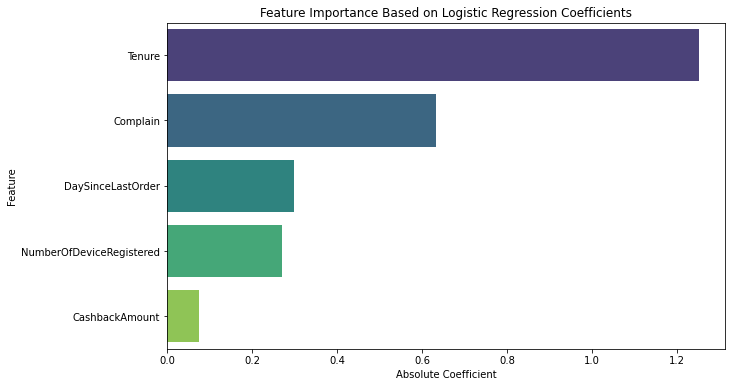

,Feature,Coefficient,Absolute_Coefficient
0,Tenure,-1.250147,1.250147
2,Complain,0.633387,0.633387
3,DaySinceLastOrder,-0.299415,0.299415
1,NumberOfDeviceRegistered,0.269741,0.269741
4,CashbackAmount,-0.075530,0.075530


In [51]:
# Calculate absolute coefficients
feature_importance = feature_coefficients.copy()
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()

# Sort features by absolute coefficient
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Absolute_Coefficient', y='Feature', palette='viridis')
plt.title('Feature Importance Based on Logistic Regression Coefficients')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

# Display the detailed feature importance table
feature_importance

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.naive_bayes import GaussianNB


# Reloading the normalized dataset (please re-upload the dataset if needed)
# Define features and target variable
features = [
    'Tenure', 'NumberOfDeviceRegistered', 'Complain', 'DaySinceLastOrder', 'CashbackAmount'

]

# Assuming `normalized_data` is already preprocessed and available
X = normalized_data[features]
y = normalized_data['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred_gnb = gnb.predict(X_test)
y_pred_proba_gnb = gnb.predict_proba(X_test)[:, 1]

# Evaluate the Gaussian Naive Bayes model
accuracy_gnb = gnb.score(X_test, y_test)
classification_report_gnb = classification_report(y_test, y_pred_gnb)
mse = mean_squared_error(y_test, y_pred_gnb)

# Output the evaluation metrics for Gaussian Naive Bayes
accuracy_gnb, classification_report_gnb, mse

(0.8534635879218473,
 '              precision    recall  f1-score   support\n\n           0       0.90      0.93      0.91       941\n           1       0.57      0.44      0.50       185\n\n    accuracy                           0.85      1126\n   macro avg       0.73      0.69      0.71      1126\nweighted avg       0.84      0.85      0.85      1126\n',
 0.14653641207815277)